## Problem statement
The dataset provides the attribute of women and their incidence of diabetes. Perform Exploratory data analysis on the dataset and come up with insights on the factors that cause diabetes in women..!!

## Data dictionary
* preg: Number of times pregnant 
* Plas:  Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
* Pres: Diastolic blood pressure (mm Hg) 
* Skin: Triceps skin fold thickness (mm) 
* Test: 2-Hour serum insulin (mu U/ml) 
* mass Body mass index (weight in kg/(height in m)^2) 
* Pedi: Diabetes pedigree function 
* Age: Age (years) 
* Class: Class variable (0 or 1) **

## Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   
import seaborn as sns
import scipy.stats as st
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


## Data Exploration

In [2]:
#Load the dataset

pima_df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [3]:
#Top 5 rows
pima_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Shape of the data
pima_df.shape

(768, 9)

In [5]:
#Checking for the info of the dataset

pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All the variables are the numric variables 

In [6]:
#Lets analysze the distribution of the various attributes
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array, 
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

pima_df[~pima_df.applymap(np.isreal).all(1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [8]:
#There are 0 values in the dataset in the Glucose,BloodPressure,SkinThickness, Insulin and BMI, we need to replace them with the NAN 

pima_df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=pima_df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0, np.NaN)

In [9]:
pima_df.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [10]:
#Checking for the missing values in the dataset

pima_df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
#Replacing the null values with the mean and median respectively

pima_df['Glucose'].fillna(pima_df['Glucose'].mean(), inplace = True)
pima_df['BloodPressure'].fillna(pima_df['BloodPressure'].mean(),inplace=True)
pima_df['SkinThickness'].fillna(pima_df['SkinThickness'].median(),inplace=True)
pima_df['Insulin'].fillna(pima_df['Insulin'].median(),inplace=True)
pima_df['BMI'].fillna(pima_df['BMI'].median(),inplace=True)

In [12]:
#Convert the target column to a categorical variable
pima_df['Outcome']=pima_df['Outcome'].astype('category')

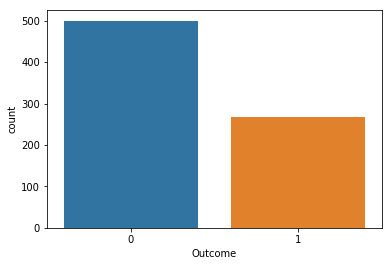

In [13]:
#Distribution of the target class

sns.countplot(pima_df['Outcome'])
#pima_df['Outcome'].value_counts(normalize=True).plt()

In [14]:
pima_df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

#### The positive class or class 1 (people having diabetes) is 35% anf the class 0 is 65%

In [15]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
pima_df.groupby(["Outcome"]).mean() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.710121,70.935397,27.726000,127.792000,30.885600,0.429734,31.190000
1,4.865672,142.165573,75.147324,31.686567,164.701493,35.383582,0.550500,37.067164


#### We observe the following from the above grouping:
* Average of all the attributes are higher for diabetic women compared to non-diabetic women

## Data visualization

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


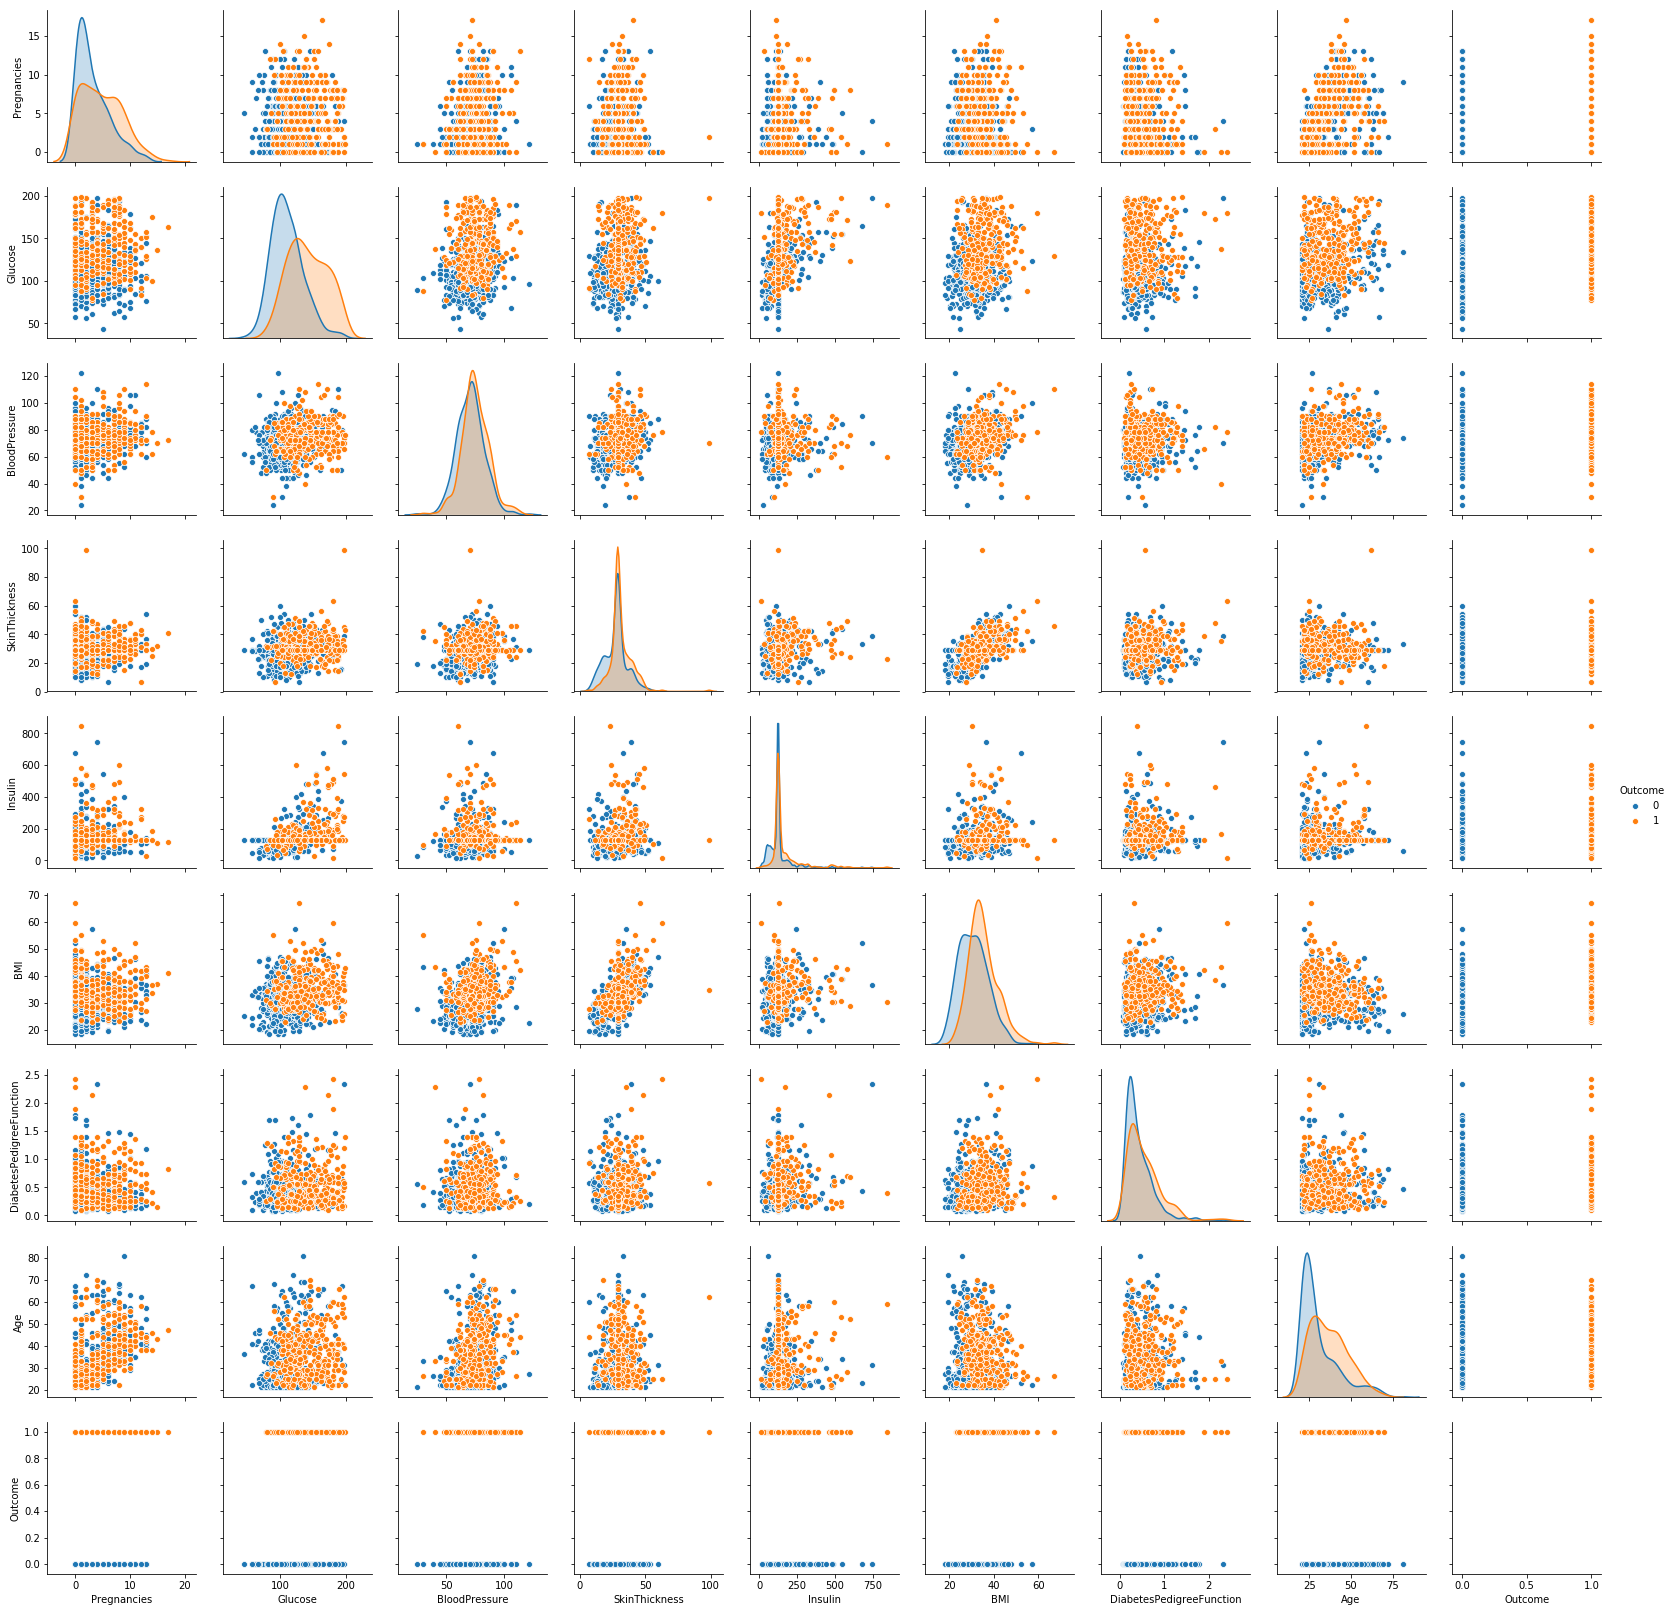

In [16]:
# Pairplot using seaborn

sns.pairplot(pima_df, hue='Outcome')


** Observation**

1. Data for all the attributes are skewed, especially for the variable "test"
2. The mean for test is 80(rounded) while the median is 30.5 which clearly indicates an extreme long tail on the right
3. Attributes which look normally distributed (plas, pres, skin, and mass).
4. Some of the attributes look like they may have an exponential distribution (preg, test, pedi, age).
5. Age should probably have a normal distribution, the constraints on the data collection may have skewed the distribution.
6. There is no obvious relationship between age and onset of diabetes.
7. There is no obvious relationship between pedi function and onset of diabetes.


In [17]:
from scipy.stats import zscore


numeric_cols = pima_df.drop('Outcome', axis=1)

# Copy the 'class' column alone into the y dataframe. This is the dependent variable
class_values = pd.DataFrame(pima_df[['Outcome']])

numeric_cols = numeric_cols.apply(zscore)
pima_df_z = numeric_cols.join(class_values)   

pima_df_z.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496,1


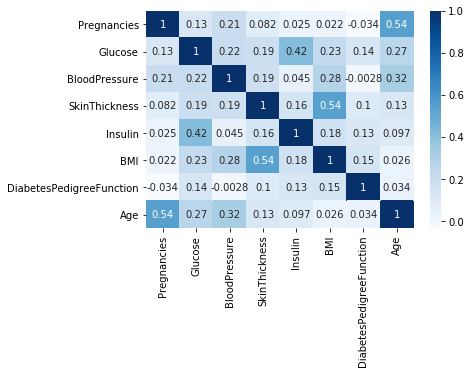

In [18]:
corr = pima_df[pima_df.columns].corr()
sns.heatmap(corr, annot = True,cmap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ee2912f40f0>,
      dtype=object)

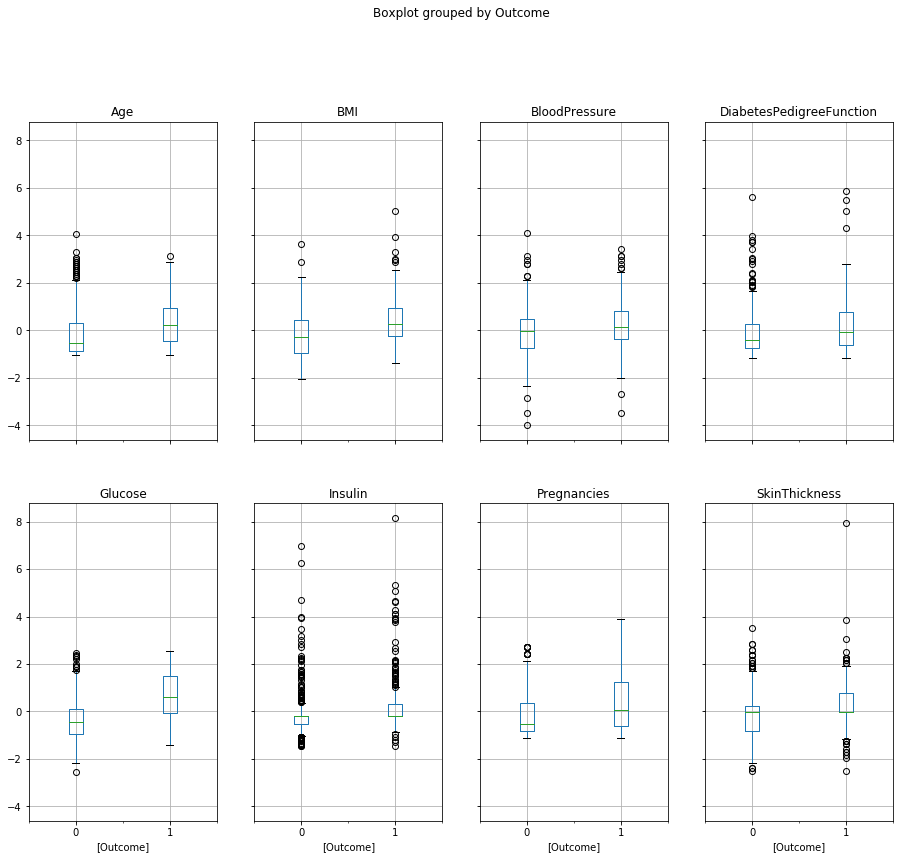

In [19]:
import matplotlib.pylab as plt

pima_df_z.boxplot(by = 'Outcome',  layout=(3,4), figsize=(15, 20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ee28a4435c0>]],
      dtype=object)

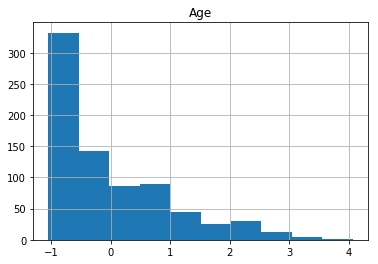

In [20]:
pima_df_z.hist('Age')

/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ee28a4011d0>]],
      dtype=object)

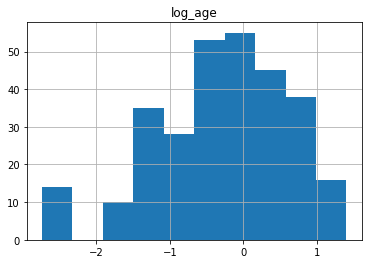

In [21]:
pima_df_z["log_age"] = np.log(pima_df_z['Age'])
pima_df_z["log_test"] = np.log(pima_df_z["Insulin"])
pima_df_z["log_preg"] = np.log(pima_df_z["Pregnancies"])
pima_df_z.hist('log_age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ee28aad0ba8>]],
      dtype=object)

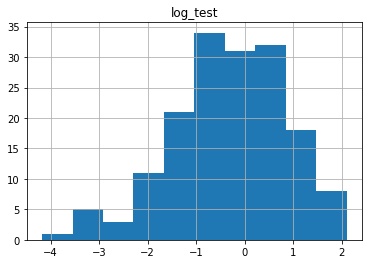

In [22]:
pima_df_z.hist("log_test")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ee28aa60748>]],
      dtype=object)

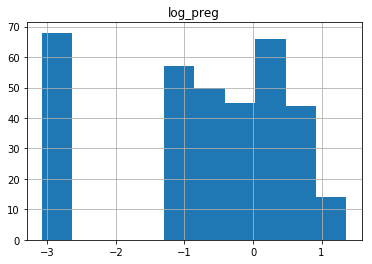

In [23]:
pima_df_z.hist("log_preg")

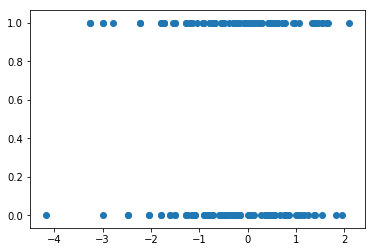

In [24]:
plt.scatter(pima_df_z['log_test'] , pima_df_z["Outcome"])

**Conclusion -**

1. Too many outliers on each dimensions indicated by long tails with gaps
2. data no normally distributed n the dimensions. 
3. log2 transformation of exponential distributed data results near normal distribution
4. None of the given attributes are able to distinguishe the two classes. The distribution of the two classes eclipse each other on all dimensions
5. Expect poor performance

# Descriptive Statistics

In [25]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00


# Inferential Statistics


**Statistical tests**

1. Normal deviate Z test
2. Student's T Test
3. One Sample T Test
4. Two Sample T Test
5. Chi square test
6. ANOVA


**Application of statistics in data science and modelling**

1. Compare the given dataset characteristics (central values and spread) with production data characterisitics. Are they same?
2. After fixing the missing values / outliers, does the data still represent the process it is supposed to
3. For classifications problems, when we use imblearn package to address class imbalances, are the data distributions same?
4. When we split data for training, validation and testing, do the three datasets have similar characterisitcs?
5. When the models are built using multiple algorithms, are the differences in distribution their scores significant?

**Note:  The statistical tests are done on individual attributes. The test should be done on at least those which we modify during EDA**

# Formulate the Null and Alternate Hypothesis

In [26]:
# H0 - The difference in mean between sample BP column and population mean for BP is a statistical fluctuation. The given data represents the population distribution on the BP column

# H1 - The difference in mean between sample BP column and population mean is significant. The difference is too high to be result of statistical fluctuation

# If statistical tests result in rejecting H0, then building a model on the given sample data and expecting it to generalize may be a mistake

# Normal Deviate Z Test  (# has the given sample come from the production)

In [27]:
# Used to compare mean of single sample with that of the population / production
# Requisites -  Number of samples >= 30, the mean and standard deviation of population should be known

# Application of NDZT  on blood pressure column 
# Population Avg and Standard Deviation for  diastolic blood pressure = 71.3 with standard deviation of 7.2 
    
# Required population parameters and sample statistic
import scipy.stats as st
Mu = 72.4  
Std = 12.09

sample_avg_bp = np.average(pima_df['BloodPressure'])
std_error_bp = Std / np.sqrt(pima_df.size) # Standard dev of the sampling mean distribution... estimated from population
print("Sample Avg BP : " , sample_avg_bp)
print("Standard Error: " , std_error_bp)

# Z_norm_deviate =  sample_mean - population_mean / std_error_bp

Z_norm_deviate = (sample_avg_bp - Mu) / std_error_bp
print("Normal Deviate Z value :" , Z_norm_deviate)

p_value = st.norm.sf(abs(Z_norm_deviate))*2 #twosided using sf - Survival Function
print('p values' , p_value)

if p_value > 0.05:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')

Sample Avg BP :  72.40518417462482
Standard Error:  0.145420099052137
Normal Deviate Z value : 0.035649643059018486
p values 0.9715617240194679
Samples are likely drawn from the same distributions (fail to reject H0)


In [28]:
# Z score magnitude is much lower than 1.96 cutoff in normal distribution for 95% CL
# This indicates that the H0 cannot be  rejected. Which means this BP sample data is from the population whose mean is 72.4 and 
# std = 12.09

# One Sample T-Test


In [29]:
# used when the two requirements of normal deviate Z test cannot be met i.e. when the population mean and standard deviation
# is unknown

Mu = 72.4   
# Std = ?  Population standard deviatin is unknown

x = pima_df['BloodPressure']  # Storing values in a list to avoid long names
est_pop_std = np.sqrt(np.sum(abs(x - x.mean())**2) / (pima_df.size - 1))     #  sqrt(sum(xi - Xbar)^2 / (n -1))

sample_avg_bp =(pima_df['BloodPressure']).mean()

std_error_bp = est_pop_std / np.sqrt(pima_df.size) # Standard dev of the sampling mean distribution... estimated from population

T_Statistic = (( sample_avg_bp - Mu) / std_error_bp)

pvalue = st.t.sf(np.abs(T_Statistic), pima_df.size-1)*2
print("Estimated Pop Stand Dev" , est_pop_std)
print("Sample Avg BP : " , sample_avg_bp)
print("Standard Error: " , std_error_bp)
print("T Statistic" , T_Statistic)
print("Pval" , pvalue)

if pvalue > 0.05:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')

Estimated Pop Stand Dev 4.029780981170755
Sample Avg BP :  72.40518417462486
Standard Error:  0.048470731963628534
T Statistic 0.10695474185841736
Pval 0.9148279889570086
Samples are likely drawn from the same distributions (fail to reject H0)


In [30]:
#T-Statistic magnitude is very large compared to Z  score of 1.96.
# P value is almost 1, much greater than 0.05 
# Reject H0 at 95% confidence
# That memans the given data column of BP has is from the population BP distribution whose mean is 72.4 and est std dev 4.02

# Two Sample T-Test


In [31]:
# Tests whether the means of two independent samples are significantly different.

# Pima Indians Dataset has many missing values in multiple columns. Let us replace the missing values with median. Does this
# step of handling missing values modify the distribution so much that statistically it is no more equivalent of original data?

pima_df_mod = pima_df.copy()


pima_df_mod['BloodPressure'] = pima_df_mod['BloodPressure'].mask(pima_df['BloodPressure'] == 0,pima_df['BloodPressure'].median())


In [32]:
from scipy.stats import ttest_ind

stat, pvalue = ttest_ind(pima_df_mod['BloodPressure'] , pima_df['BloodPressure'])
print("compare means", pima_df_mod['BloodPressure'].mean() , pima_df['BloodPressure'].mean())
print("Tstatistic , Pvalue", stat, pvalue)

if pvalue > 0.05:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')

compare means 72.40518417462486 72.40518417462486
Tstatistic , Pvalue 0.0 1.0
Samples are likely drawn from the same distributions (fail to reject H0)
